In [1]:
# Sección de imports
import nltk
from collections import Counter

---
## Tokenización

In [ ]:
texto = """El procesamiento del lenguaje natural es una rama de la Inteligencia Artificial.
NLTK es una excelente herramienta para aprender NLP.
¡Vamos a explorar sus funcionalidades!"""

In [3]:
texto_lower = texto.lower()

In [8]:
import re

texto_lower_limpio = re.sub(r"\W+", " ", texto_lower)

In [10]:
tokens = nltk.word_tokenize(texto_lower_limpio)

---
## Stopwords

In [11]:
from nltk.corpus import stopwords

stopwords_es = stopwords.words("spanish")
stopwords_es[:20]

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo']

In [13]:
len(set(stopwords_es))

313

In [15]:
# List comprehension
tokens_filtrados = [palabra for palabra in tokens if palabra not in stopwords_es]
tokens_filtrados

['procesamiento',
 'lenguaje',
 'natural',
 'rama',
 'inteligencia',
 'artificial',
 'nltk',
 'excelente',
 'herramienta',
 'aprender',
 'nlp',
 'vamos',
 'explorar',
 'funcionalidades']

In [16]:
print(f"Había {len(tokens)} tokens antes de filtrar.\nHay {len(tokens_filtrados)} tokens después de limpiar")

Había 25 tokens antes de filtrar.
Hay 14 tokens después de limpiar


---
## Función de limpieza

In [17]:
def limpiar_texto(texto, idioma="spanish", as_text=False):
    texto = texto.lower()
    texto = re.sub(r"\W+", " ", texto)
    tokens = nltk.word_tokenize(texto, language=idioma)
    stopwords = nltk.corpus.stopwords.words(idioma)
    tokens_filtrados = [palabra for palabra in tokens if palabra not in stopwords]
    if as_text:
        return " ".join(tokens_filtrados)
    else:
        return tokens_filtrados

In [18]:
texto

'El procesamiento del lenguaje natural es una rama de la Inteligencia Artificial.\nNLTK es una excelente herramienta para aprender NLP.\n¡Vamos a explorar sus funcionalidades!'

In [20]:
limpiar_texto(texto, as_text=True)

'procesamiento lenguaje natural rama inteligencia artificial nltk excelente herramienta aprender nlp vamos explorar funcionalidades'

---
## Stemming y Lematización

In [21]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("spanish")

In [22]:
tokens_filtrados = limpiar_texto(texto)

In [24]:
for token in tokens_filtrados:
    print(f"Palabra: {token} | Palabra con stemming: {stemmer.stem(token)}")

Palabra: procesamiento | Palabra con stemming: proces
Palabra: lenguaje | Palabra con stemming: lenguaj
Palabra: natural | Palabra con stemming: natural
Palabra: rama | Palabra con stemming: ram
Palabra: inteligencia | Palabra con stemming: inteligent
Palabra: artificial | Palabra con stemming: artificial
Palabra: nltk | Palabra con stemming: nltk
Palabra: excelente | Palabra con stemming: excelent
Palabra: herramienta | Palabra con stemming: herramient
Palabra: aprender | Palabra con stemming: aprend
Palabra: nlp | Palabra con stemming: nlp
Palabra: vamos | Palabra con stemming: vam
Palabra: explorar | Palabra con stemming: explor
Palabra: funcionalidades | Palabra con stemming: funcional


In [ ]:
# Lematización

from nltk.stem import WordNetLemmatizer

lema = WordNetLemmatizer()

adjs = ["funny", "funnier", "funniest",
         "pretty", "prettier", "prettiest",
         "happy", "happier", "happiest"]

for adj in adjs:
    print(f"{lema.lemmatize(adj, "a")}")

funny
funny
funny
pretty
pretty
pretty
happy
happy
happy


In [29]:
verbs = ["do", "doing", "did", "does",
         "dance", "dances", "dancing", "danced",
         "teach", "teaches", "taught", "teaching"]

for verb in verbs:
    print(f"{lema.lemmatize(verb, "v")}")

do
do
do
do
dance
dance
dance
dance
teach
teach
teach
teach


---
## Análisis de frecuencia

In [30]:
from nltk import FreqDist

texto_largo = """La televisora es la primera estación de televisión educativa y cultural de México sin fines comerciales. 
La fundación del canal tuvo como promotores a Alejo Peralta y Díaz Ceballos y Eugenio Méndez Docurro. 
Ambos contaron con el apoyo del Secretario de Educación Pública, Jaime Torres Bodet, y del Secretario de Comunicaciones, Walter Cross Buchanan.
Canal 11 con el distintivo XEIPN-TV inició transmisiones el 2 de marzo de 1959 en las instalaciones del campus Santo Tomás del Instituto Politécnico Nacional por medio de un transmisor de 5 kW. 
La señal era tan limitada que apenas se captaba en las cercanías de la emisora."""

tokens_filtrados = limpiar_texto(texto_largo)

In [39]:
frecs

FreqDist({'canal': 2, 'secretario': 2, 'televisora': 1, 'primera': 1, 'estación': 1, 'televisión': 1, 'educativa': 1, 'cultural': 1, 'méxico': 1, 'fines': 1, ...})

In [41]:
frecs = FreqDist(tokens_filtrados)

for palabra, frecuencia in frecs.items():
    print(f"Palabra \"{palabra}\" aparece {frecuencia} veces.")

Palabra "televisora" aparece 1 veces.
Palabra "primera" aparece 1 veces.
Palabra "estación" aparece 1 veces.
Palabra "televisión" aparece 1 veces.
Palabra "educativa" aparece 1 veces.
Palabra "cultural" aparece 1 veces.
Palabra "méxico" aparece 1 veces.
Palabra "fines" aparece 1 veces.
Palabra "comerciales" aparece 1 veces.
Palabra "fundación" aparece 1 veces.
Palabra "canal" aparece 2 veces.
Palabra "promotores" aparece 1 veces.
Palabra "alejo" aparece 1 veces.
Palabra "peralta" aparece 1 veces.
Palabra "díaz" aparece 1 veces.
Palabra "ceballos" aparece 1 veces.
Palabra "eugenio" aparece 1 veces.
Palabra "méndez" aparece 1 veces.
Palabra "docurro" aparece 1 veces.
Palabra "ambos" aparece 1 veces.
Palabra "contaron" aparece 1 veces.
Palabra "apoyo" aparece 1 veces.
Palabra "secretario" aparece 2 veces.
Palabra "educación" aparece 1 veces.
Palabra "pública" aparece 1 veces.
Palabra "jaime" aparece 1 veces.
Palabra "torres" aparece 1 veces.
Palabra "bodet" aparece 1 veces.
Palabra "comun

In [42]:
import matplotlib.pyplot as plt

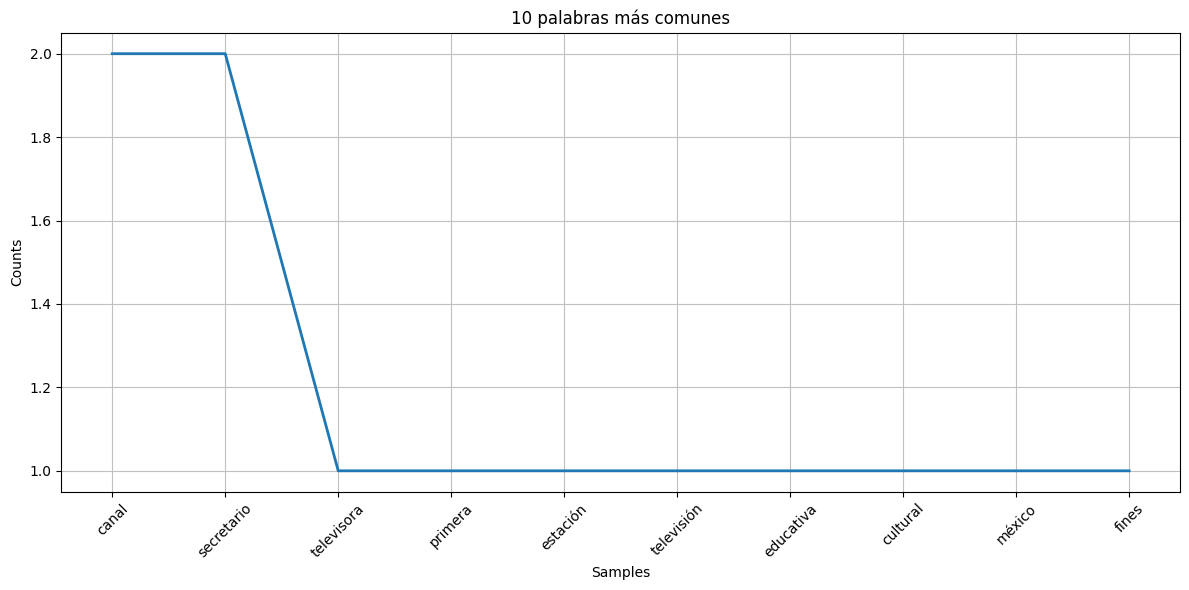

In [45]:
plt.figure(figsize=(12, 6))
frecs.plot(10, title="10 palabras más comunes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---
## POS

In [46]:
significados_pos = {
    "NN": "Sustantivo singular",
    "NNS": "Sustantivo plural",
    "VBZ": "Verbo en 3a persona singular",
    "VBG": "Verbo en gerundio",
    "JJ": "Adjetivo",
    "NNP": "Nombre propio singular"
}

In [51]:
tokens_tagged = nltk.pos_tag(verbs)

---
## NER

In [53]:
arbol = nltk.ne_chunk(tokens_tagged)

In [54]:
arbol.pretty_print()

                                              S                                                                        
   ___________________________________________|_________________________________________________________________        
do/VB doing/VBG did/VBD does/VBZ dance/VB dances/NNS dancing/VBG danced/JJ teach/NN teaches/NNS taught/VBD teaching/VBG

